<a href="https://colab.research.google.com/github/Deanelle/Stroke_Prediction/blob/main/Stroke_Predicition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Problem**

Stroke is a medical condition that can lead death. It affects the arteries leading to and within the brain.It is the fifth cuase of death and leading cuase of disability in the United States. According to the CDC someone has stroke every 40 seconds in the US with every 4 minutes someone dies with a stroke. A stroke occurs when the blood vessel that carries oxygen and nutrients to the brain is either blockd by a clot or bursts. Since strokes are prevalent and a huge health concern, it would be helpful to develop a model that will help with predict whether someone is likely to get a stroke using parameters like age, blood glucose, hypertension, etc. 

**Questions**:  

*   What features are associated with stroke? 
*   What model will best predict for a stroke based on those input features? 



**The Dataset:**

The inputs in the data include: 

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12) stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [4]:
import pandas as pd

stroke_df = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [2]:
#Importing the packagest that will be used 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [5]:
#looking at the df
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 rows and 12 colummns in the data. 

These columns are not integers nor floats: gender,ever_married,work_type,Residence_type, and smoking_status.


In [6]:
#checking the first few rows
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
#checking the last few rows
stroke_df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


From looking at the bmi column, there are a few null values that I'll have to clean. 

In [8]:
#checking the amount of null values per column in the data. 
stroke_df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

There are 201 null values in bmi and no other column has any. 

In [37]:
stroke_df.drop(['id'],axis=1,inplace=True)
stroke_df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


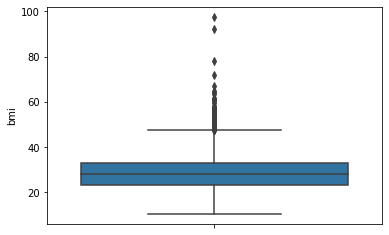

In [9]:
sns.boxplot(y="bmi", data=stroke_df);

looking at the boxplot, there seems to be outliers. 

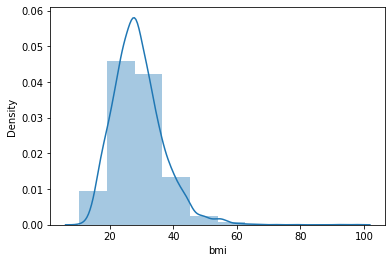

In [10]:
ax = sns.distplot(stroke_df['bmi'], bins=10)

In [11]:
#imputing the missing data in the bmi column with the median
stroke_df['bmi'].fillna(stroke_df['bmi'].median(),inplace=True)

I imputed the data with the median because it is not as effected by outliers like the mean. 

In [12]:
#no null values 
stroke_df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
#the cleaned df
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,28.1,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


The missing bmi data became 28.1 after imputting it with the median. 

In [16]:
#looking at descriptive stats
stroke_df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [17]:
#looking at the categorical variables
stroke_df.describe(include=['O'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


Text(0.5, 1.0, 'histogram of hypertension')

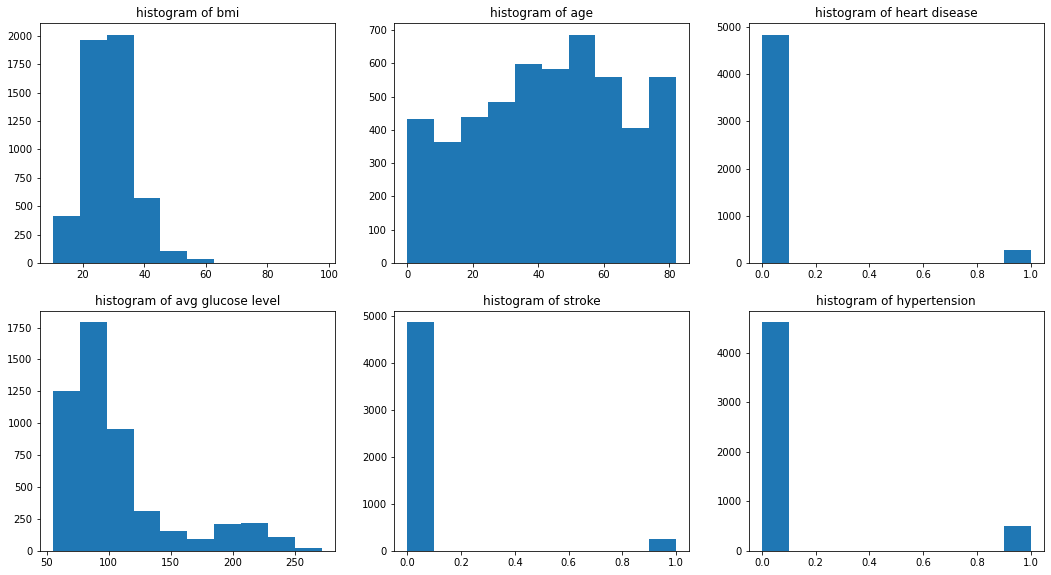

In [18]:
plt.figure(figsize=(18,15))

# Histograms of the original data
plt.subplot(3, 3, 1)
plt.hist(stroke_df['bmi'])
plt.title("histogram of bmi")

plt.subplot(3, 3, 2)
plt.hist(stroke_df["age"])
plt.title("histogram of age")

plt.subplot(3, 3, 3)
plt.hist(stroke_df["heart_disease"])
plt.title("histogram of heart disease")


plt.subplot(3, 3,4 )
plt.hist(stroke_df["avg_glucose_level"])
plt.title("histogram of avg glucose level")


plt.subplot(3, 3, 5)
plt.hist(stroke_df["stroke"])
plt.title("histogram of stroke")

plt.subplot(3, 3, 6)
plt.hist(stroke_df["hypertension"])
plt.title("histogram of hypertension")

I took a look at each variable to see its distribution. There appears to be an imbalance between those that have had a stroke and those that have not had a stroke. This will be fixed later. 

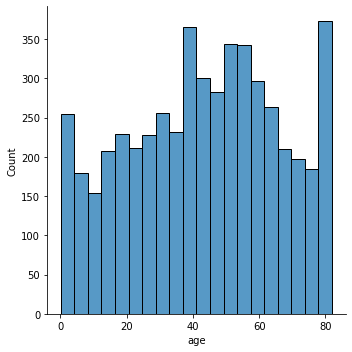

In [19]:
#distribution of the ages in the data.
sns.displot(stroke_df.age);

There are a wide range of ages included in the datset with the most coming from age 40 and 80. 

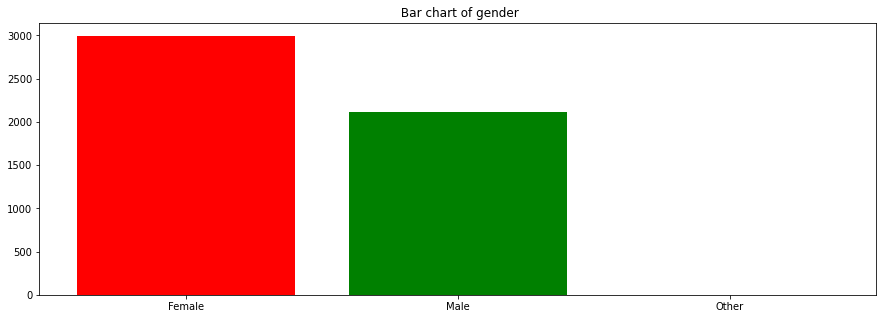

In [20]:
# Bar chart of gender
plt.figure(figsize=(15,5))
plt.bar(stroke_df.groupby("gender")["gender"].count().index, 
         stroke_df.groupby("gender")["gender"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title(" Bar chart of gender")

plt.show()

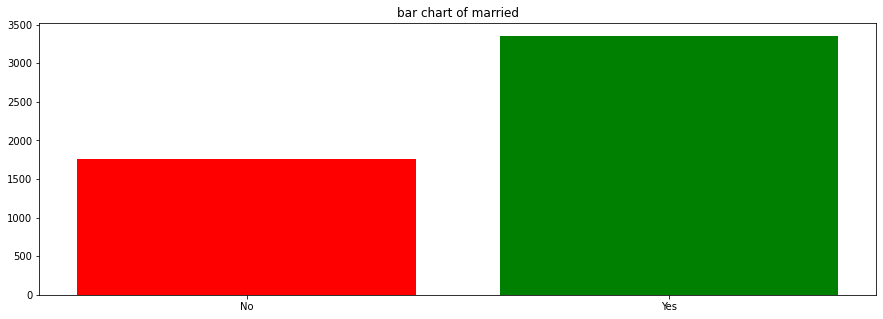

In [21]:
# Bar chart of ever_married
plt.figure(figsize=(15,5))
plt.bar(stroke_df.groupby("ever_married")["ever_married"].count().index, 
         stroke_df.groupby("ever_married")["ever_married"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("bar chart of married")

plt.show()

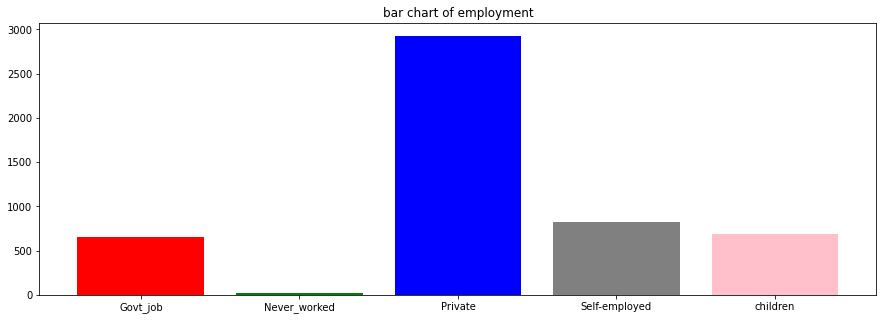

In [22]:
# Bar chart of employment
plt.figure(figsize=(15,5))
plt.bar(stroke_df.groupby("work_type")["work_type"].count().index, 
         stroke_df.groupby("work_type")["work_type"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title('bar chart of employment')

plt.show()

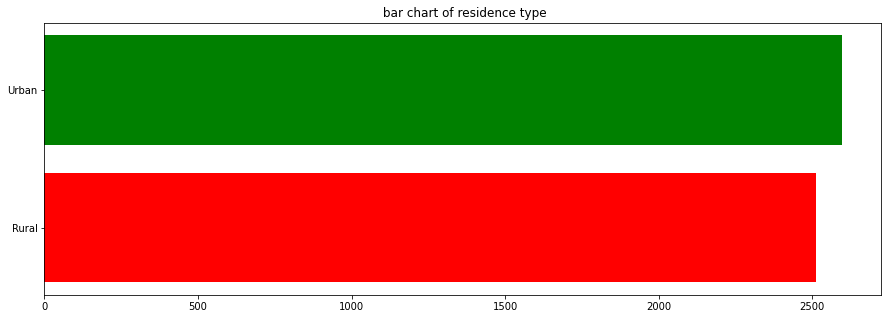

In [23]:
# Bar chart of residence type
plt.figure(figsize=(15,5))
plt.barh(stroke_df.groupby("Residence_type")["Residence_type"].count().index, 
         stroke_df.groupby("Residence_type")["Residence_type"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title(" bar chart of residence type")

plt.show()

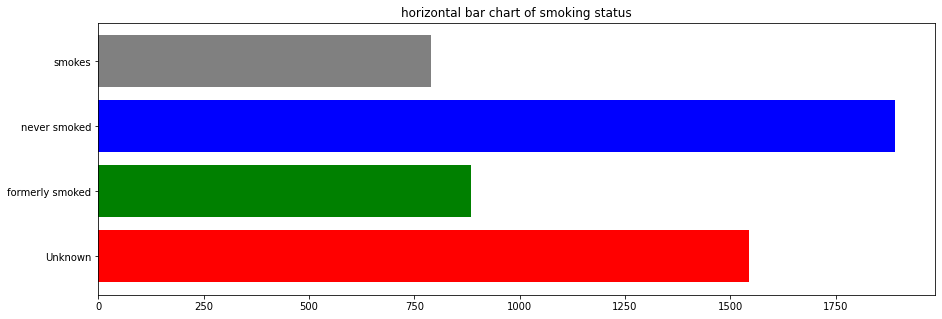

In [24]:
# Bar chart of smoking status
plt.figure(figsize=(15,5))
plt.barh(stroke_df.groupby("smoking_status")["smoking_status"].count().index, 
         stroke_df.groupby("smoking_status")["smoking_status"].count(), 
        color=["red","green","blue","grey","pink"])
plt.title("horizontal bar chart of smoking status")

plt.show()

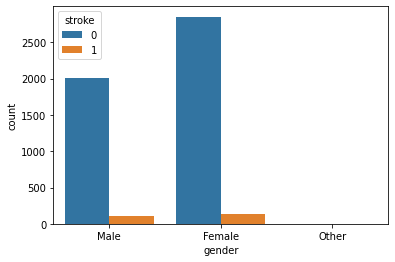

In [27]:
#count of gender and stroke 
ax = sns.countplot(x="gender", hue="stroke", data=stroke_df)

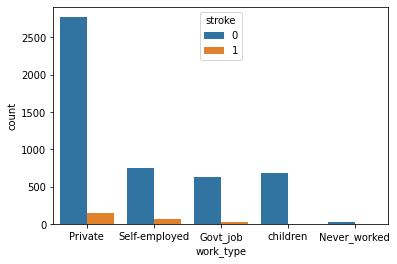

In [29]:
#count of work_type and stroke
ax = sns.countplot(x="work_type", hue="stroke", data=stroke_df)

From the countplot it appears that those with private jobs have a higher risk of stroke. Those who never worked have no instances of stroke. This could be potentially explained by less stress. 

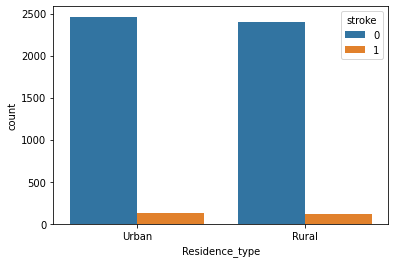

In [31]:
#count of Residence_type and stroke 
ax = sns.countplot(x="Residence_type", hue="stroke", data=stroke_df)

Interesing. I wold have thought that those who were rural had a higher risk of stroke but it seems here that it is about equally plausible that both can get a stroke. 

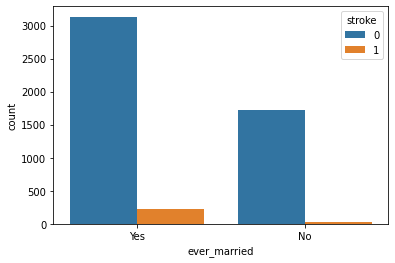

In [32]:
#count of married and stroke
ax = sns.countplot(x="ever_married", hue="stroke", data=stroke_df)

At first glance, looking at this I chuckled because it seems like those who were married had a higher risk of stroke. However, this could be explained with potentially an age thing too as those who are married tend to live longer too. 

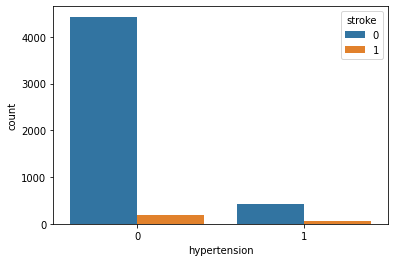

In [33]:
#count of hypertension and stroke
ax = sns.countplot(x="hypertension", hue="stroke", data=stroke_df)

I would assume that having hypertension can lead to stroke since hypertension can.However, looking at this plot there is not enough data to tell that it does lead to stroke in this dataset. 

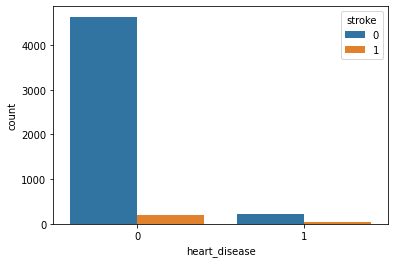

In [34]:
#count of heart_disease and stroke
ax = sns.countplot(x='heart_disease', hue="stroke", data=stroke_df)

Heart diesease generally leads to stroke but with the data it is difficult to tell if it does or not. 

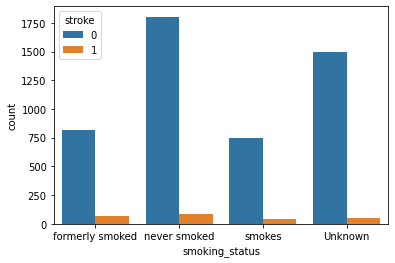

In [35]:
#count of smoking_status and stroke
ax = sns.countplot(x='smoking_status', hue="stroke", data=stroke_df)

There is not much of a difference between non smokers or smokers in terms of stroke instances. Haha, so smokers...smoke on. 

In [38]:
# Get correlation matrix before feature enginnering
corr= stroke_df.corr()['stroke'].reset_index()
corr=corr.sort_values([('stroke')],ascending=False)
corr

,index,stroke
5,stroke,1.000000
0,age,0.245257
2,heart_disease,0.134914
3,avg_glucose_level,0.131945
1,hypertension,0.127904
4,bmi,0.036110


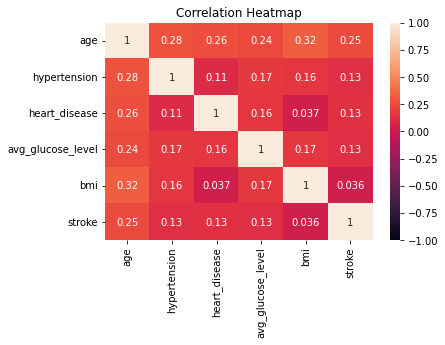

In [39]:
# Create the correlation heatmap
heatmap = sns.heatmap(stroke_df.corr(), vmin=-1, vmax=1, annot=True)
# Create the title
heatmap.set_title('Correlation Heatmap');


I looked at how the attributes corrleated with the dependent variable stroke with a correlation matrix. From the matrix, it looks as if age, whether one has had heart diesease, average glucose levels all play higher roles in predicting stroke. 

**Feature Engineering**

In [40]:
#label encoder 
cols=stroke_df.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
stroke_df[cols]=stroke_df[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(stroke_df.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender   age  hypertension  heart_disease  ever_married  work_type  \
0       1  67.0             0              1             1          2   
1       0  61.0             0              0             1          3   
2       1  80.0             0              1             1          2   
3       0  49.0             0              0             1          2   
4       0  79.0             1              0             1          3   
5       1  81.0             0              0             1          2   
6       1  74.0             1              1             1          2   
7       0  69.0             0              0             0          2   
8       0  59.0             0              0             1          2   
9       0  78.0             0              0             1          2   

   Residence_type  avg_glucose_level   bmi  smoking_status  stroke  
0              

In [41]:
#lookig the dataframe after label encoding the categorical variables
stroke_df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,28.1,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.1,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.0,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.6,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.6,1,0


In [44]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(stroke_df.drop('stroke',axis=1),stroke_df['stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(stroke_df.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,6.669168
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


After encoding the categorical features, I decided to use the Select K best score to extract the features that are best. According to the the table above, the features with the highest scores are age, heart disease, average glucose, hypertension, and marriage. 

**Fitting my model**

In [45]:
train_x,test_x,train_y,test_y=train_test_split(stroke_df[cols],stroke_df['stroke'],random_state=125,test_size=0.25)
train_x.shape,test_x.shape,train_y.shape,test_y.shape

((3832, 5), (1278, 5), (3832,), (1278,))

In [46]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)

To handle the class imbalance in the target variable, I used the SMOTE technique. 

In [47]:
x=stroke_df.drop(['stroke'], axis=1)
y=stroke_df['stroke']


In [48]:
pip install lazypredict


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 127.6 MB 20 kB/s 
     |████████████████████████████████| 302 kB 47.7 MB/s 
     |████████████████████████████████| 10.1 MB 29.5 MB/s 
     |████████████████████████████████| 72 kB 931 kB/s 
     |████████████████████████████████| 248 kB 44.2 MB/s 
     |████████████████████████████████| 25.9 MB 1.5 MB/s 
     |████████████████████████████████| 1.2 MB 48.7 MB/s 
     |████████████████████████████████| 6.8 MB 26.6 MB/s 
     |████████████████████████████████| 269 kB 66.2 MB/s 
     |████████████████████████████████| 14.5 MB 12 kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=5850e7c411ac507f1bff20a6206274299ec8a2d75c1d428ed28c7e45c501552e
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built PyYAML
  Attempting uninstall: numpy

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [ ]:
clf = LazyClassifier(verbose=0,ignore_warnings=True)
models, predictions = clf.fit(train_x, test_x, train_y, test_y)
models

100%|██████████| 29/29 [00:24<00:00,  1.18it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.42,0.60,0.60,0.55,0.04
SGDClassifier,0.39,0.59,0.59,0.52,0.12
GaussianNB,0.39,0.59,0.59,0.52,0.05
LinearSVC,0.41,0.59,0.59,0.54,0.35
LinearDiscriminantAnalysis,0.41,0.59,0.59,0.54,0.04
CalibratedClassifierCV,0.41,0.59,0.59,0.54,0.53
RidgeClassifierCV,0.41,0.59,0.59,0.54,0.08
RidgeClassifier,0.41,0.59,0.59,0.54,0.07
LogisticRegression,0.41,0.59,0.59,0.54,0.07


According to the F1 score from the lazy classifier, KNeighbors would be the algorithm that I'd want to use for predictiing whether someone will get a stroke or not. 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 

Minimum error:- 0.1267605633802817 at K = 4


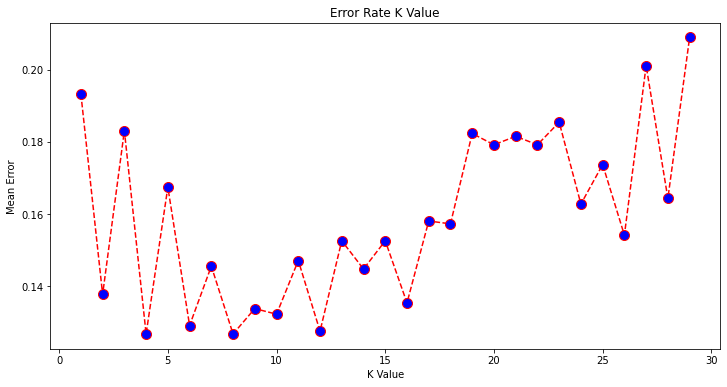

In [ ]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(train_x, train_y)
    pred_i = knn.predict(test_x)
    error.append(np.mean(pred_i != test_y))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [ ]:
y_pred = knn.predict(test_x)
print(classification_report(test_y,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.82      0.88      1217
           1       0.06      0.25      0.10        61

    accuracy                           0.79      1278
   macro avg       0.51      0.53      0.49      1278
weighted avg       0.91      0.79      0.84      1278



**Conclusion**

I used the lazy classifier to help with determining which alorgithm I wanted to use for predictions and then I used the sklearn library to run a knieghbors classifier for my model. 

Since the dataset was imbalanced I decided to use F1 score( the weighted average of precision and recall as the metric. The F1 score for the alogrithm is 88%. Meaning that it correctly predicts if someone is at risk of stroke 88% of the time. 

**Recommendation**

This is helpful to know becuase we can use the information to design programs or projects that will help to lessen stress, help with lower blood gluocse, and establishing programs that potentially will help with hypertension and heart attack such as adding more opportunities for exercise while at work or school or throughout the day which can have tiny impacts on ones health as they age which can help with lower the chances of stroke. 
